<a href="https://colab.research.google.com/github/Gurneet10/ExamHallSeatingManagementSystem-GNDPC/blob/main/Clothkart_Virtual_try_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing Helper Functions
!pip install iglovikov_helper_functions

#Installing cloth segmentation module from pypi
!pip install cloths_segmentation  > /dev/null

%matplotlib inline

In [ ]:
#Importing necessary modules
import numpy as np
import cv2
import torch
import albumentations as albu
from pylab import imshow

In [ ]:
#trying to save on google drive, so, mounting it to my google drive
from google.colab import drive
drive.mount('/content/gdrive') # connects Colab to your Google Drive

Mounted at /content/gdrive


In [ ]:
#If you want to use cloth segmentation on images from gallary, run below code
from google.colab import files as FILE
from google.colab import files
from IPython.display import Image
img = files.upload()
keys = list(img) # list of all image names from dictionary of images uploaded
allowefileformats = ['jpg','png','bmp','jpeg']
if len(img)!=1:
  print('Please Select only one image file')

elif keys[0].split('.')[-1] not in allowefileformats:
  print('Please select an image in formats: ',allowefileformats)

img_data = img[keys[-1]]
img_path = '/content/gdrive/MyDrive/project/test_image/'+keys[-1] # set root path to folder where you uploaded the data
with open(img_path,'wb') as f:
  f.write(img_data)
FILE.download(img_path)



Saving test2.jpg to test2 (2).jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

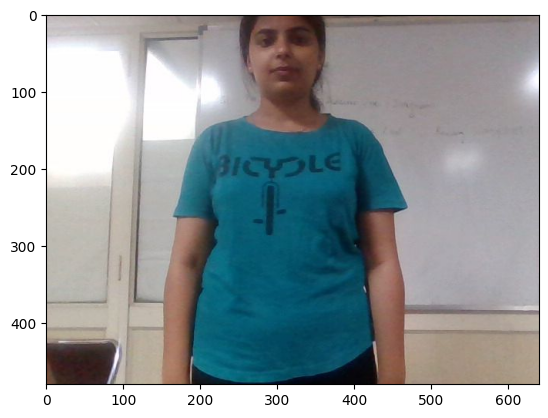

In [ ]:
from iglovikov_helper_functions.utils.image_utils import load_rgb
#showing user captured image
image = load_rgb(img_path)
imshow(np.hstack([image]))

In [ ]:
# #If you want to use cloth segmentation on webcam captured image, run below code
# from IPython.display import display, Javascript
# from google.colab.output import eval_js
# from base64 import b64decode

# def take_photo(filename='photo.jpg', quality=0.8):
#   js = Javascript('''
#     async function takePhoto(quality) {
#       const div = document.createElement('div');
#       const capture = document.createElement('button');
#       capture.textContent = 'Capture';
#       div.appendChild(capture);

#       const video = document.createElement('video');
#       video.style.display = 'block';
#       const stream = await navigator.mediaDevices.getUserMedia({video: true});

#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       // Resize the output to fit the video element.
#       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#       // Wait for Capture to be clicked.
#       await new Promise((resolve) => capture.onclick = resolve);

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       canvas.getContext('2d').drawImage(video, 0, 0);
#       stream.getVideoTracks()[0].stop();
#       div.remove();
#       return canvas.toDataURL('image/jpeg', quality);
#     }
#     ''')
#   display(js)
#   data = eval_js('takePhoto({})'.format(quality))
#   binary = b64decode(data.split(',')[1])


#   img_path = '/content/gdrive/My Drive/project/test_image/'+filename # set root path to folder where you uploaded the data
#   with open(img_path, 'wb') as f:
#     f.write(binary)
#   return img_path



In [ ]:
# #Calling Above function to run and capture the photo.
# from google.colab import files as FILE
# from IPython.display import Image
# try:
#   img_path = take_photo()
#   print('Saved to {}'.format(img_path))
#   FILE.download(img_path)
#   # Show the image which was just taken.
#   display(Image(img_path))
# except Exception as err:
#   # Errors will be thrown if the user does not have a webcam or if they do not
#   # grant the page permission to access it.
#   print(str(err))
# !pip install gdown

# import shutil
# import os
# os.makedirs(destination_folder, exist_ok=True)
# file_path = "/content/gdrive/My Drive/project/test_image/photo.jpg"
# destination_folder = "C:/Users/DELL/Desktop/pose_estimationnew"

# shutil.copy(file_path, destination_folder)
# import gdown

# def download_file(output_path):
#     url = f"https://drive.google.com/drive/folders/1LxCvBRQ4AYL9PbQLq7zEdDTX8pkt9DLb?usp=sharing"
#     gdown.download(url, output_path, quiet=False)

# # Example usage
# # file_id = "1LxCvBRQ4AYL9PbQLq7zEdDTX8pkt9DLb"
# output_path = "C:/Users/DELL/Desktop/pose_estimationnew"

# # download_file(output_path)

Importing Important things from helper functions

In [ ]:
#Importing Important things from helper functions
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

from cloths_segmentation.pre_trained_models import create_model
model = create_model("Unet_2020-10-30")
model.eval();
image = load_rgb(img_path)
print(image)


/usr/local/lib/python3.10/dist-packages/torch/hub.py:665: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


[[[194 183 187]
  [193 182 186]
  [192 181 185]
  ...
  [142 131 129]
  [144 133 129]
  [145 134 130]]

 [[195 184 188]
  [195 184 188]
  [194 183 187]
  ...
  [144 133 131]
  [145 134 130]
  [146 135 131]]

 [[197 186 190]
  [197 186 190]
  [196 185 189]
  ...
  [147 136 134]
  [147 136 134]
  [147 136 134]]

 ...

 [[120  79  61]
  [120  79  61]
  [118  79  62]
  ...
  [174 157 137]
  [173 156 136]
  [173 156 136]]

 [[120  79  61]
  [120  79  61]
  [118  79  62]
  ...
  [176 159 139]
  [176 159 139]
  [176 159 139]]

 [[118  77  59]
  [119  78  60]
  [117  78  61]
  ...
  [177 160 140]
  [177 160 140]
  [177 160 140]]]


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


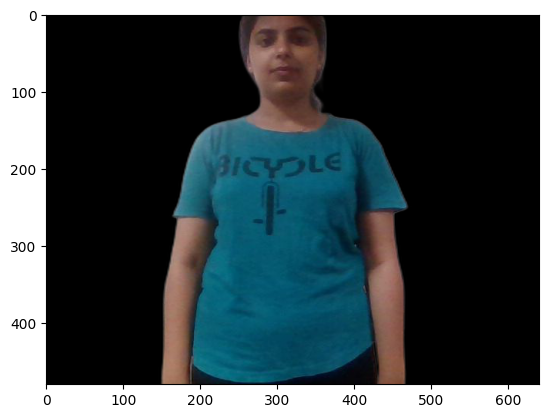

In [ ]:
# removing background
!pip install PILLOW as PIL
!pip install rembg
# imshow(image)
from rembg import remove
from PIL import Image

# Store path of the image in the variable input_path
input_path = img_path

# Store path of the output image in the variable output_path
output_path = '/content/gdrive/MyDrive/project/result/REMOVEDBG/rmbg.png'

# Processing the image
input_image = Image.open(input_path)

# Removing the background from the given image
output_image = remove(input_image)

# Creating a new image with white background
white_background = Image.new("RGB", input_image.size, (0,0,0))

# Pasting the output image onto the white background
white_background.paste(output_image, (0, 0), output_image)



# Saving the image with black background
white_background.save(output_path, 'PNG')
image = load_rgb(output_path)
imshow(np.hstack([image]))

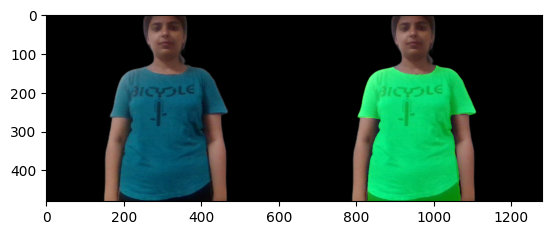

In [ ]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)
with torch.no_grad():
  prediction = model(x)[0][0]
mask = (prediction > 0).cpu().numpy().astype(np.uint8)
mask = unpad(mask, pads)

from google.colab.patches import cv2_imshow
mask_new=cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255

info = np.info(mask.dtype)
data = mask_new

# cv2.imwrite('/content/gdrive/MyDrive/content/mask.png',mask_new)

# writing segmented image
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)
imshow(dst)
dst_bgr = cv2.cvtColor(dst, cv2.COLOR_RGB2BGR)
cv2.imwrite("/content/gdrive/MyDrive/project/result/cloth_segmentation/dst.png",dst_bgr)
imshow(np.hstack([image, dst]))
mask_new=cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255

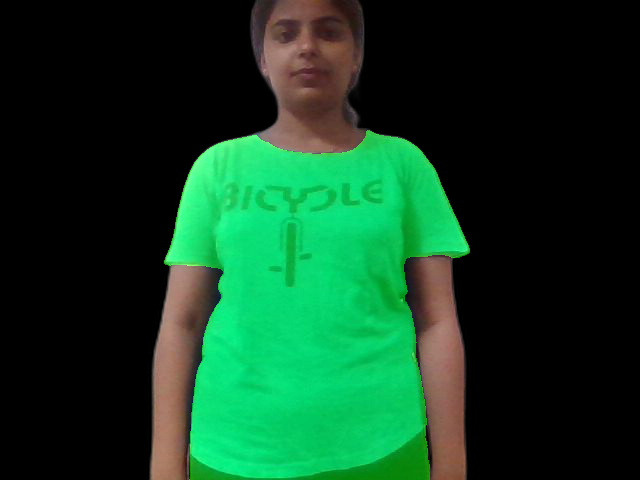

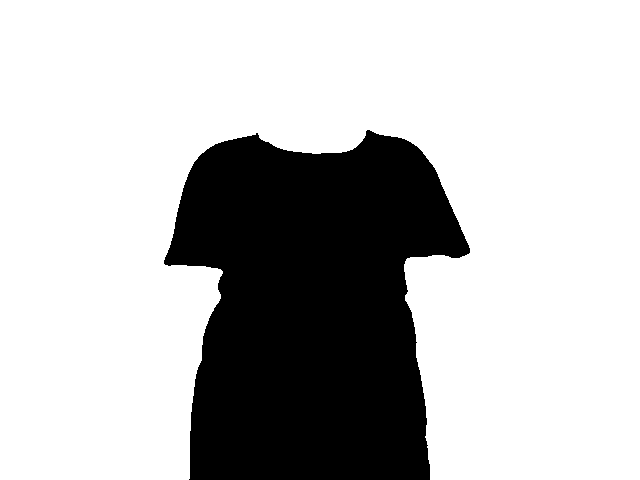

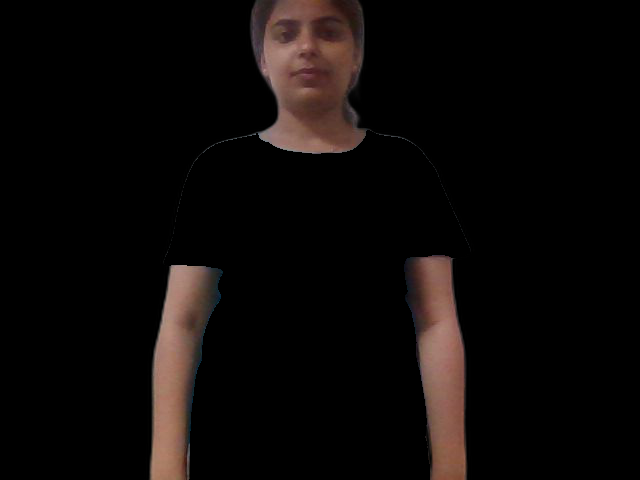

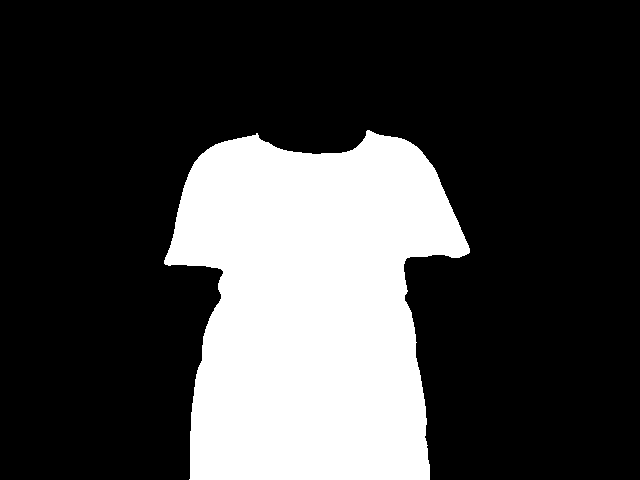

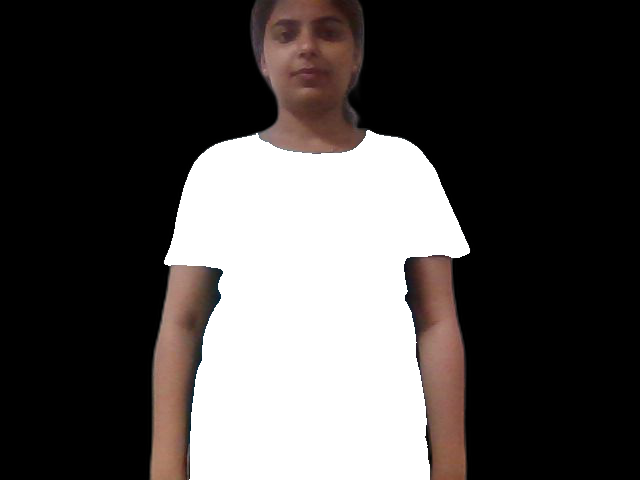

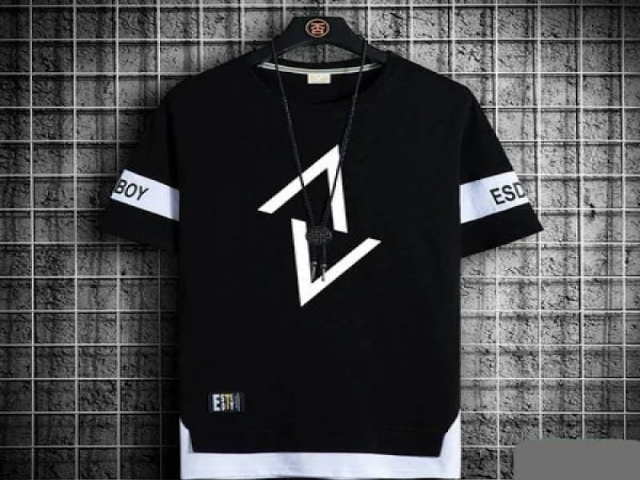

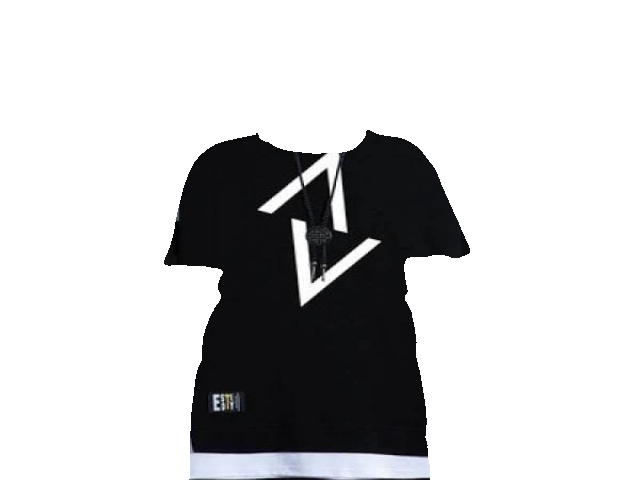

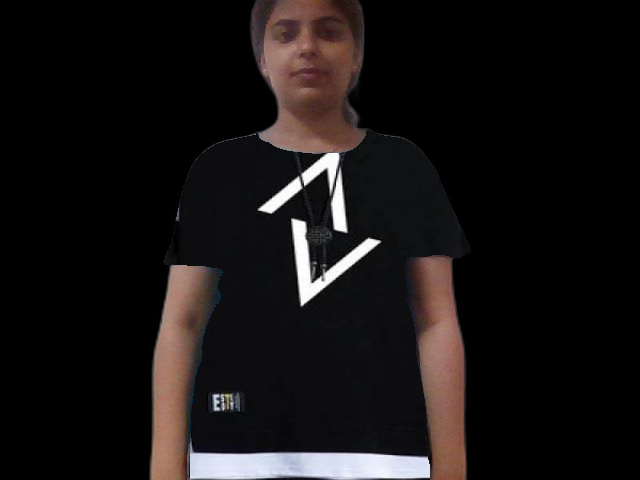

-1

In [ ]:
keypoints='content/gdrive/MyDrive/project/keypoints/keypoints.json'
Shirt='/content/gdrive/MyDrive/project/sample/shirt1.jpeg'
# Shirt='/content/gdrive/MyDrive/project/sample/shirt2.png'
mask_photo='/content/gdrive/MyDrive/clothkart/dst.png'
# changing for design
design = cv2.imread(Shirt)

from google.colab.patches import cv2_imshow
import numpy as np
import cv2

frame = cv2.imread(mask_photo)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of green color in HSV
lower_green = np.array([25, 52, 72])
upper_green = np.array([102, 255, 255])
# Threshold the HSV image to get only blue colors
mask_white = cv2.inRange(hsv,lower_green, upper_green)
mask_black = cv2.bitwise_not(mask_white)

#converting mask_black to 3 channels
W,L = mask_black.shape
mask_black_3CH = np.empty((W, L, 3), dtype=np.uint8)
mask_black_3CH[:, :, 0] = mask_black
mask_black_3CH[:, :, 1] = mask_black
mask_black_3CH[:, :, 2] = mask_black

cv2_imshow(frame)
cv2_imshow(mask_black_3CH)

dst3 = cv2.bitwise_and(mask_black_3CH,frame)
cv2_imshow(dst3)

#///////
W,L = mask_white.shape
mask_white_3CH = np.empty((W, L, 3), dtype=np.uint8)
mask_white_3CH[:, :, 0] = mask_white
mask_white_3CH[:, :, 1] = mask_white
mask_white_3CH[:, :, 2] = mask_white

cv2_imshow(mask_white_3CH)
dst3_wh = cv2.bitwise_or(mask_white_3CH,dst3)
cv2_imshow(dst3_wh)

#/////////////////

# changing for design
design = cv2.imread(Shirt)
design = cv2.resize(design, mask_black.shape[1::-1])
cv2_imshow(design)

design_mask_mixed = cv2.bitwise_or(mask_black_3CH,design)
cv2_imshow(design_mask_mixed)

final_mask_black_3CH = cv2.bitwise_and(design_mask_mixed,dst3_wh)
cv2_imshow(final_mask_black_3CH)


cv2.waitKey()